# Jupyter Notebook to showcase the features of Data Version Control (DVC)
### Thesis topic: **"Towards CI/CD for trajectory-based molecular machine learning using Git and DVC"**
#### Author: Suraj Giri 
#### Supervisor: Prof. Dr. Peter Zaspel
### **Preliminary Dataset** : 10k .xyz files with molecular trajectories of C6H6 molecules and a .dat file with energies for those 10k molecules.

#### Major Tasks:
1. Developing **Kernel Ridge Regression in DVC Structure** 
2. Developing **Testing Software in DVC Structure**
3. Jupyter Notebooks to showcase features of DVC for ML

Firstly, we developed a Kernel Ridge Regression model using QML: A Python toolkit for Quantum machine learning. The KRR model was developed in a modularized way with three stages: **prepare, train, and test**. This jupyter notebook is dedicated in showcasing the features of DVC.

#### Installing DVC
``pip install dvc`` can be used in the CLI to install DVC into the system. Since we already have DVC installed in our system, we might get some error messages. But, we can ignore them for now.

In [28]:
! pip install dvc

#### Data Management
For data tracking and Data Management, we are using **Google Drive** as remote storage. We firstly tracked the data uysing ``dvc add`` and then used the **Remote Storage** feature of DVC to store it remotely in the remote storage.

#### Remote Storage
We added google drive as our remote storage. We can add any other remote storage as well. For example, AWS S3, Azure, etc. We added google drive as our remote storage using ``dvc remote add ...`` <br>
We can see the list of our remote storage using ``dvc remote list``

In [29]:
! dvc remote list

gstorage	gdrive://1PYkhCdmillbbW1Tf5gZhGL3hhfX0L_rA


We can also see if any repository is a DVC repository using the command ``dvc list ...`` <br>
If the repo is tracked by **DVC**, we can see the list of files in the repo.

In [30]:
! dvc list https://github.com/surajgiri7/BSc_Thesis_DVC

.dvcignore                                                                      
.gitignore
.ipynb_checkpoints
DVC_features.ipynb
README.md
dataset
dataset.dvc
dvc.lock
dvc.yaml
dvc_plots
output
params.yaml
src


Pulling the Dataset from remote storage using ``dvc pull``.

In [31]:
! dvc pull

  0% Checkout|                                   |0/10008 [00:00<?,     ?file/s]
!
Building data objects from output/test/actual_pred    |0.00 [00:00,      ?obj/s]
                                                                                
!
Building data objects from dataset                    |0.00 [00:00,      ?obj/s]
Building data objects from dataset                   |1.39k [00:00,  13.8kobj/s]
Building data objects from dataset                   |3.38k [00:00,  17.4kobj/s]
Building data objects from dataset                   |5.12k [00:00,  15.4kobj/s]
Building data objects from dataset                   |7.11k [00:00,  17.0kobj/s]
Building data objects from dataset                   |9.11k [00:00,  18.0kobj/s]
Everything is up to date.                                                       


#### Switching between different versions of the Dataset and the Model
To swtich between the different versions of the model and the dataset, we can use the command ``dvc checkout ...`` <br>
Firstly we need to perform the ``git checkout`` as **Git** is the highest level of version control in our system. Then, we can use the **DVC** checkout to switch between the different versions of the dataset and the model.

In [32]:
! git checkout main # can change to various versions.
! dvc checkout

M	DVC_features.ipynb
M	dvc.lock
M	dvc_plots/index.html
M	dvc_plots/static/workspace_output_plots_Learning_Curve.png
M	output/dataset/X_train.pkl
M	output/metrics.csv
M	output/metrics.json
M	output/test/live/metrics.json
M	params.yaml
M	src/train.py
Already on 'main'
Your branch is up to date with 'origin/main'.
  0% Checkout|                                   |0/10008 [00:00<?,     ?file/s]
!
Building data objects from dataset                    |0.00 [00:00,      ?obj/s]
Building data objects from dataset                   |1.34k [00:00,  13.4kobj/s]
Building data objects from dataset                   |3.36k [00:00,  17.4kobj/s]
Building data objects from dataset                   |5.10k [00:00,  15.6kobj/s]
Building data objects from dataset                   |7.08k [00:00,  17.2kobj/s]
Building data objects from dataset                   |9.08k [00:00,  18.1kobj/s]
100% Checkout|███████████████████████▉|10005/10008 [00:00<00:00, 11161.41file/s]
!
Building data objects from output/t

#### Adding the stages og the DVC pipeline
To add the stages of the DVC pipeline, we can use the command ``dvc stage add ...`` <br>
The stages from the DVC stage add is then stored into the **dvc.yaml** file. We can also add the stages manually into the **dvc.yaml** file. <br>
After the required stages are added, we can use the command ``dvc repro ...`` to reproduce the pipeline. <br>

Addint the stage train into the **dvc.yaml** file using ``dvc stage add `` <br>

In the following command for ``dvc stage add``, each argument of the command is as follows: <br>
``-n``: Name of the stage <br>
``-d``: Dependencies of the stage <br>
``-o``: Outputs produced by the stage <br>
``-m``: Metrics of the stage <br>
``-p``: Parameters used by the stage <br>
``-O``: Outputs that are not cached in DVC <br>
``-M``: Metrics that are not cached in DVC <br>
``-P``: Parameters that are not cached in DVC <br>

<br>
All of these argument are finally followed by the command to be run in the stage.

In [33]:
! dvc stage add -n train -d output/prepared_data.pkl -d src/train.py -d dataset -o output/models/KRR_model.pkl -o output/plots/Learning_Curve.png -M output/metrics.csv -M output/metrics.json -p train.metric -p train.order -p train.sigma python src/train.py output/prepared_data.pkl

ERROR: Stage 'train' already exists in 'dvc.yaml'. Use '--force' to overwrite.


The above ``dvc stage add `` command produced the following results in the **dvc.yaml** file: <br>
    
    train:
        cmd: python src/train.py output/prepared_data.pkl
        deps:
        - output/prepared_data.pkl
        - src/train.py
        - dataset
        outs:
        - output/models/KRR_model.pkl
        - output/plots/Learning_Curve.png
        metrics:
        - output/metrics.csv:
            cache: false
        - output/metrics.json:
            cache: false
        params:
        - train.metric
        - train.order
        - train.sigma



#### Reproducing the whole DVC Pipeline
After all the required stages are added into the **dvc.yaml** file, we can reproduce the whole pipeline using the command ``dvc repro`` <br>
The ``dvc repro`` command will reproduce the whole pipeline but will skip the stages that are already cached and will only run the stage which has some changes in the code or the dependencies or the parameters. 

In [34]:
! dvc repro

'dataset.dvc' didn't change, skipping                                           
Stage 'prepare' didn't change, skipping                                         
Running stage 'train':                                                          
> python src/train.py output/prepared_data.pkl
Training set: 
[[36.8581052  12.88475304 36.8581052  ...  0.23270967  0.20153228
   0.5       ]
 [36.8581052  25.80544813 36.8581052  ...  0.40304174  0.2013175
   0.5       ]
 [36.8581052  25.84224154 36.8581052  ...  0.40300293  0.20109353
   0.5       ]
 ...
 [36.8581052  14.82299354 36.8581052  ...  0.23152695  0.1990727
   0.5       ]
 [36.8581052  14.827238   36.8581052  ...  0.23152757  0.19908694
   0.5       ]
 [36.8581052  14.83151007 36.8581052  ...  0.23152528  0.19910532
   0.5       ]]
(8000, 78)
[5.518798 5.521764 5.524758 ... 5.345108 5.336727 5.3287  ]
(8000,)


Testing set: 
[[36.8581052  14.83565657 36.8581052  ...  0.23152019  0.1991276
   0.5       ]
 [36.8581052  14.83981207 36.8

#### Visualization of the DVC Pipeline
``dvc dag`` command can be used to visualize khow the pipeline normally looks like and how the various components of the pipeline are connected to each other. 

In [35]:
! dvc dag

        +-------------+    
        | dataset.dvc |    
        +-------------+    
          **        **     
        **            **   
       *                ** 
+---------+               *
| prepare |             ** 
+---------+           **   
          **        **     
            **    **       
              *  *         
           +-------+       
           | train |       
           +-------+       
+------+ 
| test | 
+------+ 


## Experiment Management
For this feature, we can save each experiment as per our requirement into different git tags and git branches. <br> 
Then we can simply select the experiment by checking out and running ``dvc exp run `` to run that experiment. 

Running the dvc experiment using **dvc exp run**

In [36]:
! dvc exp run

  0% Checkout|                                   |0/10008 [00:00<?,     ?file/s]
!
Building data objects from output/test/actual_pred    |0.00 [00:00,      ?obj/s]
                                                                                
!
Building data objects from dataset                    |0.00 [00:00,      ?obj/s]
Building data objects from dataset                   |1.40k [00:00,  14.0kobj/s]
Building data objects from dataset                   |3.38k [00:00,  17.4kobj/s]
Building data objects from dataset                   |5.37k [00:00,  18.5kobj/s]
Building data objects from dataset                   |7.38k [00:00,  19.2kobj/s]
Building data objects from dataset                   |9.40k [00:00,  19.5kobj/s]
'dataset.dvc' didn't change, skipping                                           
Stage 'prepare' didn't change, skipping                                         
Stage 'train' didn't change, skipping                                           
Stage 'test' didn't chan

#### Comparing and Showing the results of different experiments
Here we will compare the results of the experiments that we ran for our main version of the model which we have in the **main** branch. <br>
We will compare the results of the experiment within various commits with different parameters using ``dvc exp show``. 

In [37]:
! dvc exp show

 ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  Experiment                 Created        sigma   order        MAE   errors.MAE   errors.MSE   errors.RMSE   errors.COD   train.sigma   train.order   train.metric   dataset   output/dataset   output/prepared_data.pkl   src/prepare.py   src/test.py   src/train.py  
 ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  workspace                  -                 60       0   0.032223   9.4842e-14   1.1863e-26    1.0892e-13            1   60            0             l2             2ed55dd   32c82e6          af857

We can also see the difference in the results of the experiments caused by the change in parameters by using the command ``dvc exp diff`` <br>
Not only we can see the difference in the results, we can also see and track the difference in parameters that we have used for the experiments. 

In [38]:
! dvc exp diff

Path                           Metric       HEAD        workspace    Change
output/test/live/metrics.json  errors.MAE   4.9485e-15  9.4842e-14   8.9893e-14
output/test/live/metrics.json  errors.MSE   3.8943e-29  1.1863e-26   1.1824e-26
output/test/live/metrics.json  errors.RMSE  6.2405e-15  1.0892e-13   1.0268e-13
output/metrics.json            MAE          0.032238    0.032223     -1.4774e-05



We can show the metrics that we tracked in the stages by running ``dvc metrics show`` 

In [39]:
! dvc metrics show

Path                           MAE      errors.COD    errors.MAE    errors.MSE    errors.RMSE    order    sigma
output/metrics.csv             -        -             -             -             -              -        -
output/metrics.json            0.03222  -             -             -             -              0        60.0
output/test/live/metrics.json  -        1.0           0.0           0.0           0.0            -        -


We can also compare and show the tracked metrics of the experiment by runnning ``dvc metrics diff`` 

In [40]:
! dvc metrics diff

Path                           Metric       HEAD     workspace    Changere>
output/test/live/metrics.json  errors.MAE   0.0      0.0          0.0
output/test/live/metrics.json  errors.MSE   0.0      0.0          0.0
output/test/live/metrics.json  errors.RMSE  0.0      0.0          0.0
output/metrics.json            MAE          0.29513  0.03222      -0.26291
output/metrics.json            sigma        25.0     60.0         35.0


## Displaying the plots using dvc plots show
We can disply the plots of the experiments that we ran using the command ``dvc plots show``. <br>
To display the plot of a particular experiment, we need to add the instruction for the plot into our **dvc.yaml** file. <br>
For this experiment, we have 3 graphs: a graph for training data, a graph for testing data and a graph for the metrics, and also the plot of a training curve that we had saved as a png file. <br>
The instruction for the plots in the **dvc.yaml** file for our experiment is as follows: <br>

    plots:
    - APTrain:
        template: linear
        title: Actual - Pred - Train
        x_label: Molecule
        y_label: Energy
        x: molecule
        y:
            output/test/actual_pred/train.json: "actual"
            # output/test/actual_pred/train.json: "predicted"
    - APTest:
        template: linear
        title: Actual - Pred - Test
        x_label: Molecule
        y_label: Energy
        x: molecule
        y:
            output/test/actual_pred/test.json: "actual"
            # output/test/actual_pred/test.json: "predicted"
    - CSV:
        template: scatter
        title: Metrics
        # file: output/metrics.csv
        x: sigma
        y:
            output/metrics.csv: MAE
        x_label: Sigma
        y_label: MAE Value
    - output/plots/Learning_Curve.png

In [41]:
! dvc plots show

file:///home/sgiri/BSc_Thesis_DVC/dvc_plots/index.html                          


Trying to show the same plot here in Jupyter Notebook uisnd IPython.display

In [42]:
from IPython.display import HTML, display, IFrame

# displying the contents of dvc_plots/index.html
display(HTML('dvc_plots/index.html'))
# display(IFrame(src='http://10.72.2.114:8795/tree/dvc_plots/index.html', width=700, height=500))

As I lack administrator rights, I was unable to install Javascript for Jupyter Notebook. Hence, I was unable to showcase the output of **dvc plots show**. However, I have attached a way to open the index.html file for the plots but for this to work one needs to have the **jupyter-notebook** running on the **ip: 10.72.2.114**.

In [43]:
# opening the http://10.72.2.114:8869/view/dvc_plots/index.html 
! xdg-open http://10.72.2.114:8869/view/dvc_plots/index.html

For a reference of how the Learning Curve Looks like, we have attached the output/learning_curve.png.

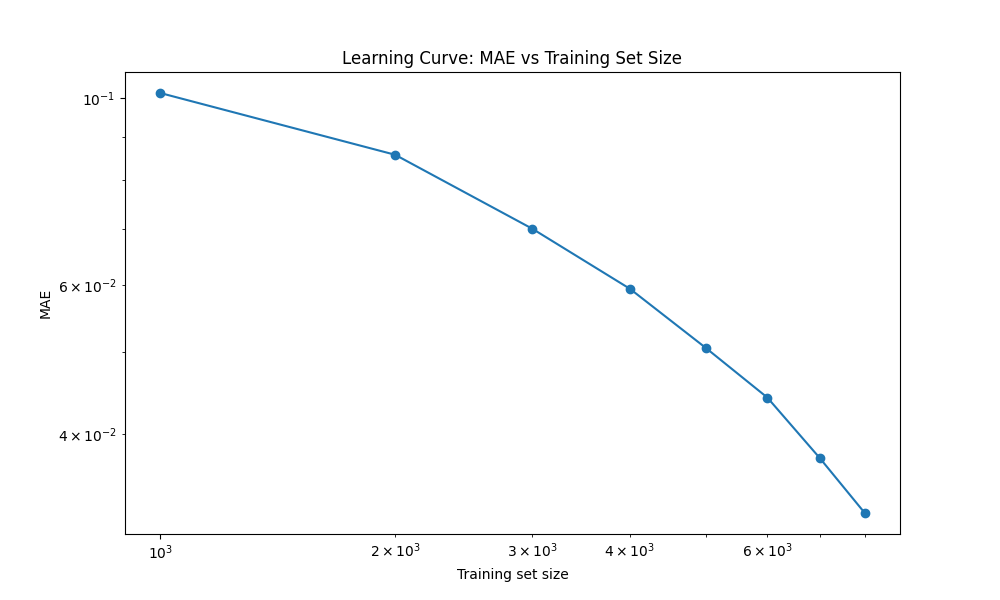

In [3]:
from IPython.display import Image
Image(filename='./output/plots/Learning_Curve.png')

Finally when everything is done and we have the required results, and we want to save everything to the remote storage, we can use the command ``dvc push`` before doing a ``git push``.

In [45]:
! dvc push

  0% Transferring|                                   |0/2 [00:00<?,     ?file/s]
!
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/cac0.00/? [00:00<?,        ?B/s]
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/0.00/217k [00:00<?,        ?B/s]
 50% Transferring|███████████████▌               |1/2 [00:01<00:01,  1.95s/file]
                                                                                
!
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/cac0.00/? [00:00<?,        ?B/s]
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/0.00/873k [00:00<?,        ?B/s]
100% Transferring|███████████████████████████████|2/2 [00:03<00:00,  1.90s/file]
  0% Transferring|                               |2/? [00:03<00:00,  1.90s/file]
!
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/cac0.00/? [00:00<?,        ?B/s]
  0%|          |/home/sgiri/BSc_Thesis_DVC/.dvc/c0.00/139 [00:00<?,        ?B/s]
  0% Transferring|                               |3/? [00:05<00:00,  1.81s/file]
  0% Transferring|    